In [12]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install spicy

%matplotlib inline

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
music2019 = pd.read_csv('2019.csv', index_col=0)

In [14]:
music2019.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93


### 1) Combine all of the CSV files into a single dataset using Pandas. It should be held in a variable called all_top_songs

In [15]:
path = r'C:/home/janaina/musical_analysis/'                    
all_files = glob.glob(os.path.join(path, "music*.csv"))
all_top_songs = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "*.csv"))))
all_top_songs.to_csv('all_top_songs.csv')

### 2) Clean the dataset to make sure the following columns are either integer or floats and not objects:
####      id    year     bpm     nrgy     dnce     db     live     val     dur     acous     spch     pop 

In [16]:
all_top_songs.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)
all_top_songs.dtypes

Id            int64
title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

Note: Use Pandas, Matplotlib, and/or Seaborn to answer the questions below.

###  3) What is the most popular song in the dataset?


In [17]:
#mostpopulars = all_top_songs.sort_values(by='pop', ascending=False)
#print (mostpopulars.head(5))

mostpop =  all_top_songs[all_top_songs['pop']==all_top_songs['pop'].max()]
print()
print("The most popular song in the dataset is: ", mostpop.title[0])
print()


The most popular song in the dataset is:  Memories



The answer was calculate by using the max function, that returns the maximum of the values over the requested axis.

### 4) What artist has the most songs in the dataset?

In [18]:
artist = all_top_songs.artist.value_counts().head(1)
print("The most popular artist in the dataset is", artist)

The most popular artist in the dataset is Katy Perry    17
Name: artist, dtype: int64


The answer was calculate by using the value_counts function, that returns a series containing counts of unique values. Using the head() function; it was possible to access the top artist.

### 5)  What is the most popular genre of music in the dataset?


In [19]:
genre = all_top_songs["top genre"].value_counts().head(1)
print("The most popular genre of music in the dataset is", genre)

The most popular genre of music in the dataset is dance pop    327
Name: top genre, dtype: int64


The answer was calculate by using the value_counts function, that returns a series containing counts of unique values. Using the head() function; it was possible to access the most popular genre of music

### 6) Are there any songs in the dataset more than once?

In [20]:
morethanonce = (all_top_songs.title.value_counts() >=2 )
quantity = morethanonce.value_counts()[True]
print("Yes, there are", quantity)
print()
print("and these are the songs",all_top_songs.title.value_counts().head(19) )

Yes, there are 19

and these are the songs Say Something                                      2
All I Ask                                          2
Castle Walls (feat. Christina Aguilera)            2
Stitches                                           2
Hello                                              2
Sugar                                              2
Love Yourself                                      2
The Hills                                          2
We Are Never Ever Getting Back Together            2
I Like It                                          2
Kissing Strangers                                  2
Runnin' (Lose It All)                              2
Company                                            2
Written in the Stars (feat. Eric Turner)           2
Just the Way You Are                               2
Here                                               2
First Time                                         2
A Little Party Never Killed Nobody (All We Got)    2
Mar

The answer was calculate by using the value_counts function, that returns a series containing counts of unique values. It was added a condition to return only songs with more than 2 apperances. This way it was possible to arrive at the number of 19 songs with at least 2 apperances. Using the function value_counts and  head() function, it was possible to access these songs present more than once.

### 7) Is there a relationship between popularity and danceability?


<AxesSubplot:xlabel='pop', ylabel='dnce'>

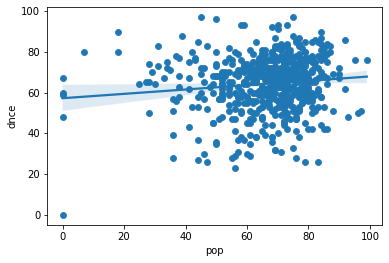

In [21]:
sns.scatterplot(data=all_top_songs, x="pop", y="dnce")
sns.regplot(x='pop',y='dnce',data=all_top_songs, fit_reg=True) 

It was used a  scatter plot with one variable on each axis, to look for a relationship between them. If the variables are correlated, the points will fall along a line or curve. However, it is not what is shown, what demonstrates that correlation between popularity and danceability is inexistent. Even if the scatter diagram had shown a relationship, it should not be assumed assume that one variable caused the other - both may be influenced by a third variable

### 8) Does having a higher bpm lead to having a higher energy score?

<AxesSubplot:xlabel='bpm', ylabel='nrgy'>

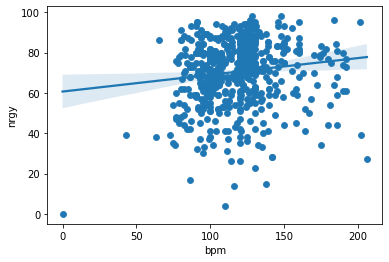

In [22]:
sns.scatterplot(data=all_top_songs, x="bpm", y="nrgy")
sns.regplot(x='bpm',y='nrgy',data=all_top_songs, fit_reg=True) 

It was used a scatter plot with one variable on each axis, to look for a relationship between them. If the variables are correlated, the points will fall along a line or curve. However, it is not what is shown, what demonstrates that correlation between bpm and energy score is inexistent. Even if the scatter diagram had shown a relationship, it should not be assumed assume that one variable caused the other - both may be influenced by a third variable

### 9) Which genre has the highest energy score?


In [23]:
energy =  all_top_songs[all_top_songs['nrgy']==all_top_songs['nrgy'].max()]
print("The genre that has the  highest energy score is big room and boy band (both with 98 energy), as shown below")
print()
print(energy)

The genre that has the  highest energy score is big room and boy band (both with 98 energy), as shown below

     Id     title          artist top genre  year  bpm  nrgy  dnce  dB  live  \
50   51     Hello  Martin Solveig  big room  2010  128    98    67  -3    10   
59  199  Pom Poms  Jonas Brothers  boy band  2013  148    98    68  -2    28   

    val  dur  acous  spch  pop  
50   45  191      1     3    0  
59   90  198      7     9   52  


The answer was calculate by using the max function, that returns the maximum of the values over the requested axis.